In [1]:
# 금일 연습문제는 이름분석으로 진행할 것임

In [2]:
# 참고하면 좋은 글 https://nittaku.tistory.com/142
import pandas as pd
import numpy as np
import plotly

In [3]:
names1880 = pd.read_csv('data/datasets/babynames/yob1880.txt', names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# 남자아이와 여자아이의 태어난 수
names1880.sex.value_counts()

M    1058
F     942
Name: sex, dtype: int64

In [5]:
names1880.groupby('sex')['births'].sum()#성별에 따른 태어난 아이들의 수?

sex
F     90993
M    110493
Name: births, dtype: int64

In [6]:
frame = pd.read_csv(f'data/datasets/babynames/yob{1881}.txt', names=['name','sex','births'])
frame.head()

,name,sex,births
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [7]:
pd.concat([names1880,frame]).head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [8]:
pieces = []
for y in range(1880, 2011):
    frame = pd.read_csv(f'data/datasets/babynames/yob{y}.txt', names=['name','sex','births'])
    frame['year'] = y
    pieces.append(frame)
    # print(frame)
    # print(str(y)+'='*50)

In [9]:
names = pd.concat(pieces, ignore_index=True) # 리스트 안에 데이터프레임이 있는데 이를 한꺼번에 합칠 수 있음
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names.births.sum() # 1880년도부터 2010년까지 태어난 아이의 수 & 이름별 5명이상태어난 아이들만...

322402727

In [11]:
# Mary 라는 이름을 가지고 태어난 아이는 총 몇명인가?
names[names.name == 'Mary']['births'].sum()
# 시대에 따라 선호하는 이름이 바뀌거나, 특정 성만 사용한 이름이거나, 공용으로 사용중인 성 등..

4119074

In [12]:
# sex	F	M
# year		
# 1880	90993	110493
# 1881	91955	100748
# 1882	107851	113687
# 1883	112322	104632
# 1884	129021	114445
# ...	...	...
# 2006	1896468	2050234
# 2007	1916888	2069242
# 위와 같이 출력되도록 만들기
names.pivot_table('births', 'year', 'sex', aggfunc=sum)

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<Axes: xlabel='year'>

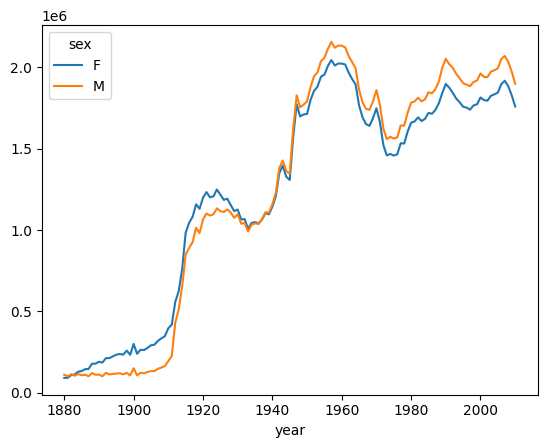

In [13]:
total_births = names.pivot_table('births', 'year', 'sex', aggfunc=sum)
total_births.plot() # 이를 통해 판다스에도 시각화 기능은 있다는 것을 확인할 수 있음

출생수가 다소 비슷함. 근데 19세기 후반엔 남성 출산비율이 높아지다가 20세기에 오면서 급속도로 증가하다가 60년대에는 여성이 더 늘어나기 시작함

In [14]:
# names.groupby(['year','sex']).groups

In [15]:
# 1880년에 태어난 여자 아이 총합으로 1880년에 태어난 각 여자 아이의 births 열 값을 나눔 
# 이름의 비율
names2 = names[(names['year'] == 1880) & (names['sex'] == 'F')]
names2.groupby('name')[['births']].sum()/names2.births.sum()
# 나빼고 아무도 못 푼건가?

,births
name,
Abbie,0.000780
Abby,0.000066
Abigail,0.000132
Ada,0.007165
Adah,0.000264
...,...
Zoe,0.000253
Zola,0.000077
Zona,0.000088


In [16]:
# 강사님 코드
names2 = names[(names['year'] == 1880) & (names['sex'] == 'F')]
names2.births / names2.births.sum()

0      0.077643
1      0.028618
2      0.022013
3      0.021309
4      0.019188
         ...   
937    0.000055
938    0.000055
939    0.000055
940    0.000055
941    0.000055
Name: births, Length: 942, dtype: float64

In [17]:
def add_prop(grp):
    # print(grp)
    # print("="*50)
    grp['prop']=grp['births']/grp['births'].sum()
    return grp

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)
# 그룹화시 사용된 키들이 행 인덱스가 되지만, 그룹키를 False로 지정하여 행 인덱스가 되지 않도록 설정
# 근데 내꺼에서는 행인덱스가 안나옴...
names.groupby(['year', 'sex']).prop.sum() # 합계가 1이 되어야 함

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [18]:
names[(names.year==1880) & (names.sex == 'F')].head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [19]:
names[(names.year==2010) & (names.sex == 'F')].head() # 다양성이 더 커짐

,name,sex,births,year,prop
1656946,Isabella,F,22731,2010,0.012923
1656947,Sophia,F,20477,2010,0.011641
1656948,Emma,F,17179,2010,0.009766
1656949,Olivia,F,16860,2010,0.009585
1656950,Ava,F,15300,2010,0.008698


In [20]:
# 상위 1000개 (1~1000위) 이름에 대한 태어난 아이의 수
# names.sort_values('births', ascending=False).head(1000)
def getTop1000(grp):
    # print(grp.sort_values('births', ascending=False)[:1000])
    # print('='*50)
    return grp.sort_values('births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(getTop1000).reset_index(drop=True)
top1000.head() # 해마다 1000개의 이름, 성별(2), 131년 이므로 262000개가 되어야 하지만 초반에는 이름이 1000개가 되지 않아서 262000보다 조금 적음

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [21]:
girls = top1000[top1000['sex'] == 'F']
boys = top1000[top1000['sex'] == 'M']
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [22]:
total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


<Axes: xlabel='year'>

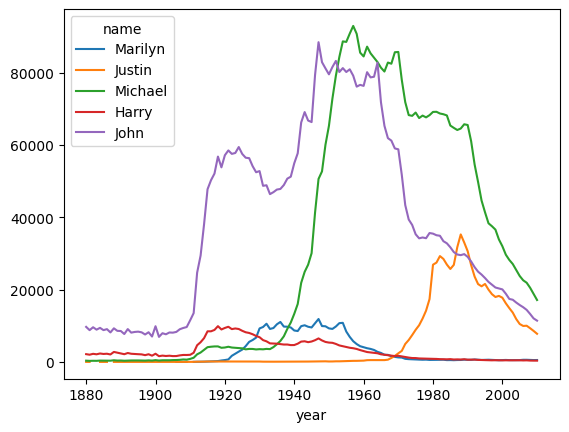

In [24]:
subset = total_births[['Marilyn', 'Justin', 'Michael', 'Harry','John']]
subset.plot()

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

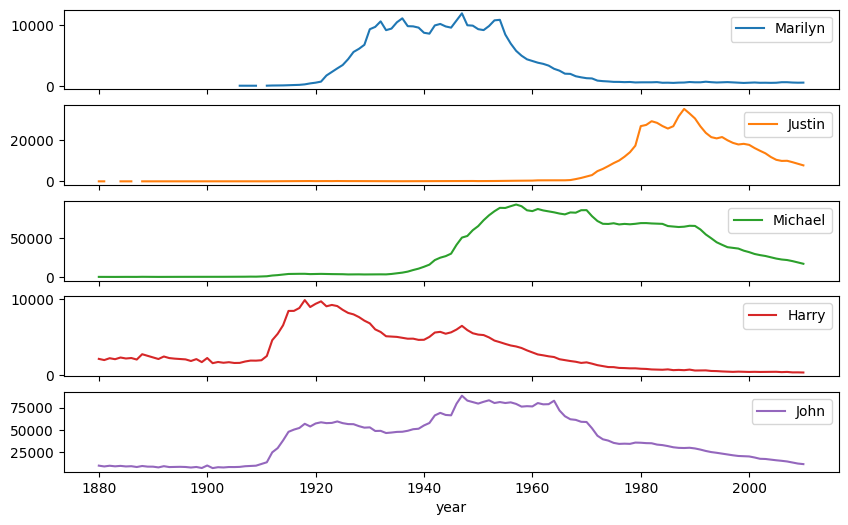

In [25]:
subset.plot(subplots=True, figsize=(10,6))

In [26]:
top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
# 이름이 1~1000등까지 포함된다는 의미임.
# 즉 숫자가 1이면 모든 이름이 포함되고, 1보다 작으면 이름이 상위 1000위까지의 이름은 2009년도 기준 여성은 73%있다는 것임
# 이것을 보아도 이름의 다양성이 커진다는 것을 확인이 가능함

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<Axes: title={'center': 'sum of tb by year and sex'}, xlabel='year'>

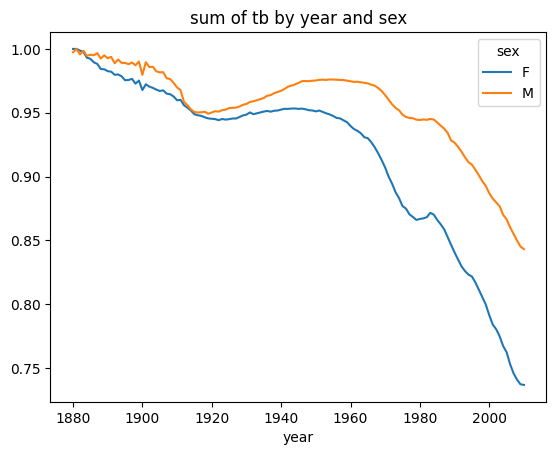

In [27]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='sum of tb by year and sex') # 시각적으로 보면 더 크게 느껴짐

In [28]:
df = boys[boys['year'] == 2010]; df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [29]:
# prop 기준 내림차 정렬
df.sort_values('prop', ascending=False)

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [30]:
#df.sort_values('prop', ascending=False)
df['prop'].sort_values(ascending=False)
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum[:20] # prop_cumsum의 50%지점이 어디일까?

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
260887    0.097648
260888    0.105406
260889    0.112852
260890    0.120276
260891    0.127672
260892    0.135023
260893    0.142368
260894    0.149603
260895    0.156827
260896    0.164021
Name: prop, dtype: float64

In [31]:
prop_cumsum[:120] # 116번 라인에서 50%를 조금 넘은 것을 확인할 수 있는데 이렇게 하는것은 노가다이므로 다른 방법

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
260992    0.498861
260993    0.500652
260994    0.502442
260995    0.504222
260996    0.505996
Name: prop, Length: 120, dtype: float64

In [32]:
prop_cumsum.searchsorted(0.5) # 50%가 막 넘은 이름의 종류가 117(인덱스 = (1) +116)개 있음
# 2010에 태어난 남자 아이들 이름중 상위 1000개의 이름을 추출했을 때,
# 50% 비율에 해당하는 아이들 이름의 종류가 117개 있음

116

In [33]:
# 그럼 여자 아이들의 50%의 비율에 해당하는 이름은 몇 종류?
df2 = girls[girls['year'] == 2010]
prop_cumsum2 = df2['prop'].sort_values(ascending=False).cumsum()
prop_cumsum2.searchsorted(0.5) # 245+1 = 246개
# 이로써 다양성이 어떻게 되는지 성별에 따라 비교할 수 있음

245

In [34]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [35]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

<Figure size 700x700 with 0 Axes>

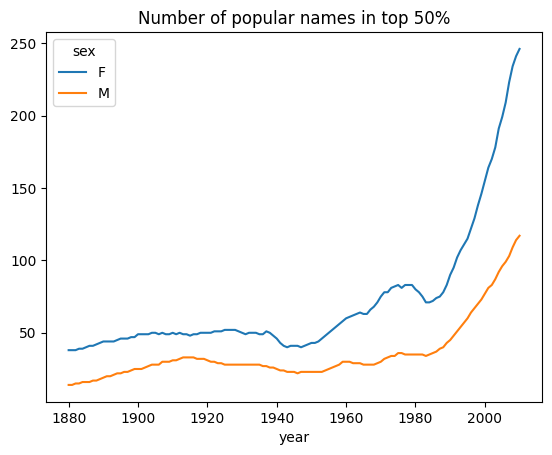

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
diversity.plot(title='Number of popular names in top 50%')

In [37]:
# 데이터 분야로 관공서같은 곳에 취업하면 면접 준비시에 ADsP 책같은 것을 보는 것이 좋음
# 그리고 사회의 문제점에 대해서 분석을 많이 해봐야함

In [38]:
# name열에 last_letter 열을 추가하고 이름의 마지막 글자가 입력되도록 만들기
names['last_letter'] = names.name.str[-1]
names
# names['last_letter']=names.name.apply(lambda x: x[-1])

,name,sex,births,year,prop,last_letter
0,Mary,F,7065,1880,0.077643,y
1,Anna,F,2604,1880,0.028618,a
2,Emma,F,2003,1880,0.022013,a
3,Elizabeth,F,1939,1880,0.021309,h
4,Minnie,F,1746,1880,0.019188,e
...,...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003,e
1690780,Zyonne,M,5,2010,0.000003,e
1690781,Zyquarius,M,5,2010,0.000003,s
1690782,Zyran,M,5,2010,0.000003,n


In [39]:
def get_last_letter(x):
    return x[-1]
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

# plotly

In [40]:
# !pip install plotly==5.11.0
# https://wikidocs.net/185049
# https://wikidocs.net/book/8909 # 강사님 추천 및 아래 코드들은 여기 교재를 기준으로 설명됨
# https://plotly.com/consulting-and-oem/

In [41]:
# plotly 시각화
# graph_objects 모듈 = 세세한 코드 구성
# express 모듈(주로 사용. 간단하므로) = 간단한 코드 구현

In [42]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],title="A Figure Specified By express")
fig.show()
# 위코드가 에러가 나온다면 아래 주석 코드 추가해야됨
# from IPython.display import HTML
# HTML(fig.to_html())

In [46]:
df = px.data.iris(); df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [48]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")
fig.show()
#fig.show() 에러발생시 아래와 같이 HTML 함수로 시각화 결과 출력
# HTML(fig.to_html())

In [ ]:
# plotly 시각화
# 1) graph_objects 모듈(세세하게 시각화)
# 2) express 모듈(주로 사용)

# 시각화 과정
# 그래프 생성(graph_objects /  express) -> 그래프 업데이트(add_trace함수, update_함수들)

In [49]:
import plotly.graph_objects as go

In [53]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")
fig.show()

In [58]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],width=600, height=400)
fig.show()

In [68]:
fig = go.Figure()
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2])) # 시각적 데이터 표현
fig.show()

In [54]:
fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

In [61]:
fig = go.Figure(data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])])
fig.update_layout(width=600,height=400)
fig.show()

In [74]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], title='제목')
fig.update_layout(
    width=600,
    height=400,
    margin_l=50, # left
    margin_r=50, # right
    margin_b=100, # bottom
    margin_t=100, # top
    paper_bgcolor="LightSteelBlue",
)
fig.show() # 가장 바깥의 사각형 자체가 figure임, trace는 그래프

In [70]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], title="Title 설정하기")
fig.update_layout(
                 title_x = 0.5,
                 title_y = 0.9,
                 title_xanchor = "center",
                 title_yanchor = "middle")
fig.show() # 좌표로는 (x,y)로 세팅 되어 있으며 x가 가로, y가 세로임

In [ ]:
# 담주 월요일 정도 분석 및 시각화 해보면 어떨지. 
# 오전 혹은 오후 중 3시간 정도 과제없이 분석만 해보는 것으로 문제를 줄 것임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pieces = []
for y in range(1880, 2011):
    frame = pd.read_csv(f'data/datasets/babynames/yob{y}.txt', names=['name','sex','births'])
    frame['year'] = y
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True) # 리스트 안에 데이터프레임이 있는데 이를 한꺼번에 합칠 수 있음
print(names.shape)
names.head()

(1690784, 4)


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [46]:
# 1. 최근 Steven이라는 최근 미국에서 인기있는 이름인가?
names[names.name == 'Steven'].tail(20) 
# 확인해보면 여성보다 남성이 압도적으로 많이 사용하는 이름임. 또한 줄어가는 것으로 보임
# 2010년 기준 3399명이므로 3399명에 해당하는 순위를 탐색
year2010 = names[names.year == 2000].sort_values('births', ascending=False).reset_index(drop=True)
steven_rank = year2010[year2010.name == 'Steven'].index[0] # 89번째 인덱스에 속해있음
last_rank = year2010.index[-1] # 29757
steven_rank/last_rank*100 # 퍼센테이지로 따졌을 때 상위 0.3% 에 들정도로 많은 이름을 Steven으로 작명함
# 결론적으로 인기가 있다고도 할 수 있을 것으로 보임

0.299089289914978

<Axes: xlabel='year'>

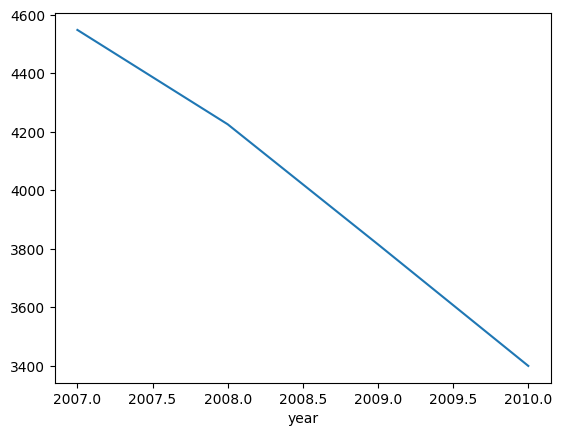

In [49]:
# 2. 아이폰 출시(07년 6월) 이후 미국에서 스티브라는 출생아 이름이 증가했는가?
steven = names[names.name == 'Steven']
steven = steven[steven.year >= 2007]
steven.groupby('year')['births'].sum().plot() # 전체적으로 스티븐 이라는 이름은 감소하는 추세임;

In [95]:
# 3. 1960년 전까지 미국에서 TOP10순위 안에 들정도로 인기있던 이름이 1960년대 이후부터 왜 인기가 줄곧 시들해졌을까?
names1960b = names[(names.year < 1960)].sort_values('births').reset_index(drop=True)
def getTop10(grp):
    return grp.sort_values('births', ascending=False)[:10]
grouped = names1960b.groupby(['year'])
top10 = grouped.apply(getTop10).reset_index(drop=True)
top10.pivot_table('births','year','name')
# 이름의 다양성이 늘어나면서 선택하는 이름의 폭이 늘어났음. 이는 개성의 표출이기도 함
# 또한 국내에서는 작명이라는 것이 사주와 관련된 것이 있듯 미국에서 또한 이와 관련된 것이 있을 수 있으며
# 유명인의 이름을 따서 이름을 작명하는 경향도 있을 것으로 생각됨
# 과거에 쓰이던 이름에 다른 의미가 부여되며 기피하는 현상또한 있을 것 같음
# 이외의 내용은 잘 모르겠음...

name,Anna,Barbara,Betty,Charles,David,Deborah,Debra,Donald,Dorothy,Elizabeth,...,Mary,Michael,Patricia,Richard,Robert,Ruth,Shirley,Susan,Thomas,William
year,,,,,,,,,,,,,,,,,,,,,
1880,2604.0,NaN,NaN,5348.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2534.0,9533.0
1881,2698.0,NaN,NaN,4637.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8524.0
1882,3143.0,NaN,NaN,5092.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2610.0,9298.0
1883,3306.0,NaN,NaN,4826.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8387.0
1884,3860.0,NaN,NaN,4802.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,NaN,NaN,NaN,NaN,86144.0,52303.0,NaN,NaN,NaN,NaN,...,63159.0,88285.0,NaN,53511.0,83674.0,NaN,NaN,NaN,NaN,59907.0
1956,NaN,NaN,NaN,NaN,81597.0,NaN,48303.0,NaN,NaN,NaN,...,61752.0,90587.0,NaN,52851.0,83869.0,NaN,NaN,NaN,NaN,58927.0
1957,NaN,NaN,NaN,NaN,82355.0,NaN,NaN,NaN,NaN,NaN,...,61090.0,92700.0,NaN,52398.0,81682.0,NaN,NaN,45946.0,NaN,56803.0


In [159]:
# 4. 여아/남아 모음의 비율? 성별과 관련이 있을까?
# 영문에는 AEIOU 가 모음임
import re
names_f = names[names.sex == 'F'].reset_index(drop=True) # 여자 모음
names_m = names[names.sex == 'M'].reset_index(drop=True) # 여자 
def gather(x):
    cnt = 0
    if x.count('a'):
        cnt += x.count('a')
    if x.count('e'):
        cnt += x.count('e')
    if x.count('i'):
        cnt += x.count('i')
    if x.count('o'):
        cnt += x.count('o')
    if x.count('u'):
        cnt += x.count('u')
    return cnt
gather_f = names_f.name.apply(gather)
names_f['gather'] = gather_f
names_f 

gather_m = names_m.name.apply(gather)
names_m['gather'] = gather_m
names_m.head()

,name,sex,births,year,gather
0,John,M,9655,1880,1
1,William,M,9533,1880,3
2,James,M,5927,1880,2
3,Charles,M,5348,1880,2
4,George,M,5126,1880,3


In [170]:
# 한글깨짐 현상 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [181]:
print('여성의 이름에 모음이 포함될 확률',names_f[names_f.gather > 0].name.count()/names_f.name.count())
print('남성의 이름에 모음이 포함될 확률',names_m[names_m.gather > 0].name.count()/names_m.name.count())
# 아주 조금이지만 여성이 이름에 더 모음을 사용할 확률이 높음

여성의 이름에 모음이 포함될 확률 0.9937409423447562
남성의 이름에 모음이 포함될 확률 0.9903275922067446


<Axes: >

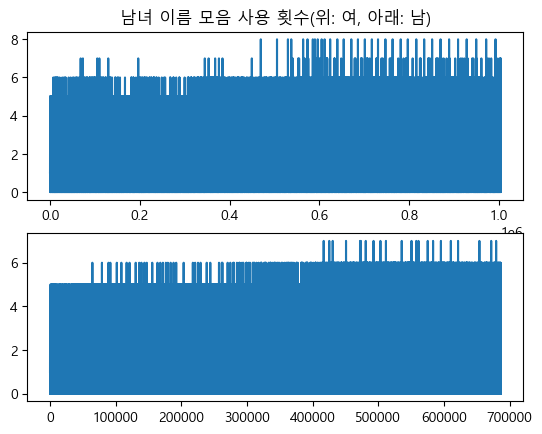

In [182]:
plt.subplot(2,1,1)
plt.title('남녀 이름 모음 사용 횟수(위: 여, 아래: 남)')
names_f.gather.plot() # 여성 모음
plt.subplot(2,1,2)
names_m.gather.plot() # 남성 모음
# 해당 차트를 보면 남성이 여성보다 모음의 개수가 다소 적은 것을 알 수 있음
# 다만 유의미할 정도의 차이라고 보기는 어려울 것 같음

In [187]:
# 5. 여아의 이름에 가장 많이 등장하는 철자? 적게 등장하는 철자?
def get_a(x):
    return 'a' in x
def get_e(x):
    return 'e' in x
def get_i(x):
    return 'i' in x
def get_o(x):
    return 'o' in x
def get_u(x):
    return 'u' in x
names_f['a']=names_f.name.apply(get_a)
names_f['e']=names_f.name.apply(get_e)
names_f['i']=names_f.name.apply(get_i)
names_f['o']=names_f.name.apply(get_o)
names_f['u']=names_f.name.apply(get_u)
names_f

,name,sex,births,year,gather,a,e,i,o,u
0,Mary,F,7065,1880,1,True,False,False,False,False
1,Anna,F,2604,1880,1,True,False,False,False,False
2,Emma,F,2003,1880,1,True,False,False,False,False
3,Elizabeth,F,1939,1880,3,True,True,True,False,False
4,Minnie,F,1746,1880,3,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1003980,Zylynn,F,5,2010,0,False,False,False,False,False
1003981,Zyniya,F,5,2010,2,True,False,True,False,False
1003982,Zyonnah,F,5,2010,2,True,False,False,True,False
1003983,Zyriana,F,5,2010,3,True,False,True,False,False


In [223]:
total = names_f.groupby('sex')['a','e','i','u','o'].sum() # 모음이 사용된 사람수 총합
total = total.stack()
total[total == total.max()] # 'a'가 이름에 제일 많이 들어가는 모음임

sex   
F    a    731997
dtype: int64

In [239]:
# 6. 과거에 인기 있던 이름 중에 최근에 인기 없는 이름?
names2000 = names[(names.year < 2000) & (names.year >= 1990)].sort_values('births').reset_index(drop=True)
def getTop20(grp):
    return grp.sort_values('births', ascending=False)[:20]
grouped = names2000.groupby(['year'])
top20 = grouped.apply(getTop20).reset_index(drop=True)
top20.pivot_table('births','year','name')

name,Amanda,Andrew,Anthony,Ashley,Austin,Brandon,Brittany,Christopher,Daniel,David,...,Matthew,Michael,Nicholas,Robert,Ryan,Samantha,Sarah,Tyler,William,Zachary
year,,,,,,,,,,,,,,,,,,,,,
1990,34391.0,33640.0,NaN,45544.0,NaN,NaN,36532.0,52314.0,33794.0,33735.0,...,44788.0,65268.0,27900.0,28858.0,29238.0,25864.0,25803.0,NaN,NaN,NaN
1991,28884.0,31519.0,NaN,43482.0,NaN,26018.0,29091.0,47099.0,30899.0,30399.0,...,41632.0,60780.0,27360.0,26826.0,27528.0,25648.0,NaN,NaN,NaN,NaN
1992,25030.0,30528.0,NaN,38449.0,NaN,29614.0,24972.0,42459.0,29121.0,28389.0,...,37730.0,54364.0,27751.0,NaN,27004.0,NaN,NaN,28792.0,NaN,24795.0
1993,NaN,27303.0,NaN,34844.0,NaN,28738.0,NaN,38222.0,28647.0,26999.0,...,35772.0,49551.0,28105.0,NaN,26715.0,23659.0,24220.0,29798.0,NaN,25531.0
1994,NaN,25999.0,NaN,30272.0,23193.0,29484.0,NaN,34789.0,28030.0,24832.0,...,33641.0,44461.0,27755.0,NaN,24053.0,NaN,NaN,30477.0,NaN,25126.0
1995,NaN,25826.0,NaN,26599.0,25903.0,26891.0,NaN,32662.0,26679.0,23014.0,...,32870.0,41396.0,29156.0,NaN,23088.0,NaN,NaN,29148.0,NaN,23131.0
1996,NaN,25220.0,NaN,23676.0,25655.0,25846.0,NaN,30893.0,25075.0,22978.0,...,32070.0,38359.0,27714.0,NaN,21799.0,NaN,NaN,26953.0,NaN,22362.0
1997,NaN,25178.0,NaN,20890.0,25108.0,25185.0,NaN,29100.0,23909.0,21852.0,...,31501.0,37542.0,27254.0,NaN,NaN,NaN,20674.0,24878.0,NaN,21924.0
1998,NaN,23638.0,NaN,NaN,23472.0,23828.0,NaN,26995.0,23116.0,20849.0,...,31133.0,36604.0,26627.0,NaN,20192.0,20187.0,NaN,23708.0,20822.0,20573.0


In [240]:
names2010 = names[(names.year >= 2000)].sort_values('births').reset_index(drop=True)
def getTop20(grp):
    return grp.sort_values('births', ascending=False)[:20]
grouped = names2010.groupby(['year'])
new_top20 = grouped.apply(getTop20).reset_index(drop=True)
new_top20.pivot_table('births','year','name')

name,Abigail,Aiden,Alexander,Andrew,Anthony,Ava,Brandon,Christopher,Daniel,David,...,Matthew,Michael,Nicholas,Noah,Olivia,Ryan,Sophia,Tyler,William,Zachary
year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,23622.0,19640.0,NaN,20330.0,24916.0,22287.0,19726.0,...,28563.0,32016.0,24644.0,NaN,NaN,20261.0,NaN,21497.0,20643.0,19845.0
2001,NaN,NaN,NaN,22399.0,19723.0,NaN,NaN,23107.0,20958.0,19317.0,...,26783.0,29666.0,22835.0,NaN,NaN,18283.0,NaN,19266.0,20087.0,18181.0
2002,NaN,NaN,17700.0,21996.0,19571.0,NaN,NaN,21665.0,21291.0,18640.0,...,25142.0,28220.0,21380.0,NaN,NaN,17654.0,NaN,18260.0,20103.0,NaN
2003,NaN,NaN,17701.0,22133.0,20125.0,NaN,NaN,20727.0,21018.0,18589.0,...,23979.0,27086.0,19680.0,NaN,NaN,19565.0,NaN,18165.0,19976.0,NaN
2004,NaN,NaN,17906.0,21683.0,19581.0,NaN,NaN,19607.0,20954.0,18354.0,...,22857.0,25416.0,18498.0,NaN,NaN,19481.0,NaN,17426.0,20213.0,NaN
2005,NaN,NaN,18102.0,20695.0,19341.0,NaN,NaN,19142.0,20184.0,18074.0,...,21440.0,23774.0,17055.0,NaN,NaN,17967.0,NaN,16971.0,19025.0,NaN
2006,NaN,NaN,18201.0,19686.0,19367.0,16925.0,NaN,19635.0,20017.0,17583.0,...,20285.0,22592.0,NaN,16304.0,NaN,16411.0,NaN,NaN,18915.0,NaN
2007,NaN,NaN,18107.0,18407.0,19570.0,18031.0,NaN,19960.0,20194.0,17468.0,...,18693.0,21915.0,NaN,16561.0,NaN,NaN,17002.0,NaN,18839.0,NaN
2008,NaN,NaN,18639.0,16711.0,18347.0,17007.0,NaN,17876.0,18935.0,16246.0,...,17526.0,20524.0,NaN,NaN,17030.0,NaN,NaN,NaN,18337.0,NaN


In [253]:
# 20세기와 21세기로 데이터를 구분
c20 = top20.name.unique()
c21 = new_top20.name.unique()
print(len(c20))
print(len(c21))
res = []
for n in c20:
    if n in c21:
        res.append(n)
print(f'20세기 이전에 유행한 이름은 {len(res)}개 이며 현재 순위에서 내려간 이름은 {res}가 있음.')

29
33
20세기 이전에 유행한 이름은 20개 이며 현재 순위에서 내려간 이름은 ['Michael', 'Christopher', 'Matthew', 'Joshua', 'Daniel', 'David', 'Andrew', 'James', 'Joseph', 'Ryan', 'John', 'Nicholas', 'Brandon', 'Tyler', 'Jacob', 'Zachary', 'Emily', 'Hannah', 'William', 'Anthony']가 있음.


In [259]:
# 7. 작명인 입장 - 이름의 트렌드?
def name_len(n):
    return len(n)
names['name_length']=names.name.apply(name_len)
names.name_length.describe()
# 위 분석으로 봤을 때 평균적으로 이름은 6글자를 중심으로 이름을 작명함.

count    1.690784e+06
mean     6.173089e+00
std      1.475976e+00
min      2.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      1.500000e+01
Name: name_length, dtype: float64